<a href="https://colab.research.google.com/github/samilarinc/engineerdocs/blob/main/Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gcloud auth login
!gcloud auth application-default login

In [ ]:
!gsutil -m -q cp -r gs://engineerdocs/sakso .

(2964, 2364)

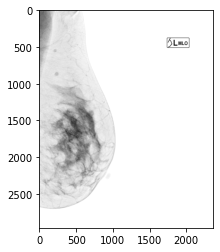

In [202]:
import numpy as np
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np

image_path = 'sakso/822670221/LMLO.dcm'
ds = dicom.dcmread(image_path)
np_ds = ds.pixel_array

# np_ds = np_ds / 4095.0

plt.imshow(np_ds, cmap='gray')
np_ds.shape

0.12907631100006256


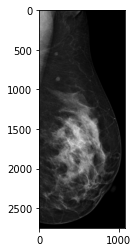

In [203]:
# Apply Otsu's thresholding to segment the breast region
from time import perf_counter
from skimage import filters
import cv2
# start = perf_counter()
img = 4095 - np_ds
thresh = filters.threshold_otsu(img)
binary = img > thresh

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 100))
binary = cv2.morphologyEx(binary.astype(np.uint8), cv2.MORPH_GRADIENT, kernel)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

breast_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(breast_contour)
cropped_img = img[y:y+h, x:x+w]
# stop = perf_counter()
# print(stop-start)
plt.imshow(cropped_img, cmap='gray')

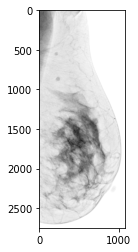

In [204]:
plt.imshow(4095-cropped_img, cmap ='gray')

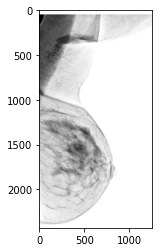

In [201]:
plt.imshow(cv2.bitwise_not(cropped_img), cmap = 'gray')

In [99]:
# (_, mask) = cv2.threshold(img, 1.0, 255.0, cv2.THRESH_BINARY);
# Apply Otsu's thresholding to segment the breast region
thresh = filters.threshold_otsu(np_ds)
binary = np_ds > thresh

# Use morphological transformations to clean up the segmented image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = cv2.morphologyEx(binary.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
temp = mask.copy()
(contours, ) = cv2.findContours(temp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sort contours by largest first (if there are more than one)
contours = sorted(contours, key=lambda contour:len(contour), reverse=True)
roi = cv2.boundingRect(contours[0])

# use the roi to select into the original 'stitched' image
np_ds2 = img[roi[1]:roi[3], roi[0]:roi[2]]

error: ignored